# **ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑù Ïã§Ïäµ Í≥ºÏ†ú**

Í∏∞Ïàò: 22Í∏∞
Ïù¥Î¶Ñ: ÍπÄÌù¨Îßù

Ïù¥ Í≥ºÏ†úÎäî ARIMA Î™®Îç∏ÏùÑ ÌôúÏö©ÌïòÏó¨ 2014ÎÖÑ 6Ïõî 1ÏùºÎ∂ÄÌÑ∞ 2024ÎÖÑ 6Ïõî 1ÏùºÍπåÏßÄÏùò Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÏÑùÌïòÍ≥† ÏòàÏ∏°ÌïòÎäî Í≥ºÏ†ïÏúºÎ°ú Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.

Í∞Å Îã®Í≥ÑÏóêÏÑú ÌïÑÏöîÌïú ÏΩîÎìúÎ•º Ïã§ÌñâÌïòÍ≥†, ÎπàÏπ∏ÏùÑ Ï±ÑÏõå Í≥ºÏ†úÎ•º ÏôÑÏÑ±ÌïòÏÑ∏Ïöî.

---



- DataReader([Ï¢ÖÎ™©Ï†ïÎ≥¥],[Îç∞Ïù¥ÌÑ∞ÏÜåÏä§],[ÏãúÏûëÏùº],[Ï¢ÖÎ£åÏùº])
    - High(ÏµúÍ≥†Í∞Ä)
    - Low(ÏµúÏ†ÄÍ∞Ä)
    - Open(ÏãúÍ∞Ä)
    - Close(Ï¢ÖÍ∞Ä)
    - Volume(Í±∞ÎûòÎüâ)
    - Adj Close (ÏàòÏ†ïÏ¢ÖÍ∞Ä;Î∂ÑÌï†,Î∞∞Îãπ,Î∞∞Î∂Ñ,Ïã†Ï£º Î∞úÏÉùÏù¥ Îêú Í≤ΩÏö∞Î•º Í≥†Î†§ÌïòÏó¨ Ï£ºÏãùÍ∞ÄÍ≤©ÏùÑ Ï°∞Ï†ïÌï¥Îëî Í∞ÄÍ≤©)

In [ ]:
!pip install yfinance pmdarima matplotlib
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


## **1. Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞ ÏàòÏßë Î∞è Ï¥àÍ∏∞ ÌÉêÏÉâ**

### **Î™©Ìëú**
- GoogleÏùò Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞Î•º Yahoo FinanceÏóêÏÑú ÏàòÏßëÌïòÏó¨ Í∏∞Î≥∏Ï†ÅÏù∏ ÌÉêÏÉâÏ†Å Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏùÑ ÏàòÌñâÌï©ÎãàÎã§. Îç∞Ïù¥ÌÑ∞Ïùò Íµ¨Ï°∞ÏôÄ ÌäπÏÑ±ÏùÑ Ïù¥Ìï¥ÌïòÍ≥†, ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑùÏùò Í∏∞Ï¥àÎ•º ÎßàÎ†®Ìï©ÎãàÎã§.
---

- **ÏãúÏûëÏùº**: `2014-06-01`
- **Ï¢ÖÎ£åÏùº**: `2024-06-01`
- **Ï¢ÖÎ™©**: `GOOG`
---

### **ÏßÄÏãúÏÇ¨Ìï≠**:
- 2014ÎÖÑ 6Ïõî 1ÏùºÎ∂ÄÌÑ∞ 2024ÎÖÑ 6Ïõî 1ÏùºÍπåÏßÄÏùò Google Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞Î•º Yahoo FinanceÏóêÏÑú Î∂àÎü¨Ïò§ÏÑ∏Ïöî.
- Îç∞Ïù¥ÌÑ∞Î•º Îã§Ïö¥Î°úÎìúÌïú ÌõÑ, Îç∞Ïù¥ÌÑ∞Ïùò Ï≤´ 5ÌñâÏùÑ Ï∂úÎ†•ÌïòÏÑ∏Ïöî.
- Îç∞Ïù¥ÌÑ∞Ïùò Í∏∞Ï¥à ÌÜµÍ≥Ñ ÏöîÏïΩ(ÌèâÍ∑†, ÌëúÏ§ÄÌé∏Ï∞®, ÏµúÏÜåÍ∞í, ÏµúÎåÄÍ∞í Îì±)ÏùÑ Ï∂úÎ†•ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞Ïùò ÌäπÏÑ±ÏùÑ ÌôïÏù∏ÌïòÏÑ∏Ïöî.



In [3]:
# ÏãúÏûëÏùº, Ï¢ÖÎ£åÏùº ÏÑ§Ï†ï
start = '2014-06-01'
end = '2024-06-01'

# Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú
data = yf.download('GOOGL' , start=start, end=end)

# Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏: Ï≤´ 5Ìñâ Ï∂úÎ†•
print(data.head())

print()
# Îç∞Ïù¥ÌÑ∞Ïùò ÌÜµÍ≥ÑÏ†Å ÏöîÏïΩ ÌôïÏù∏
print(data.describe())

[*********************100%***********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2014-06-02  28.487499  28.520500  27.834999  28.216999  28.147303  33210000
2014-06-03  28.045000  28.120001  27.626499  27.725500  27.657017  40626000
2014-06-04  27.576000  27.929001  27.427999  27.688000  27.619610  34582000
2014-06-05  27.855499  28.250000  27.752501  28.246500  28.176729  35868000
2014-06-06  28.408001  28.440001  27.979000  28.301500  28.231594  34804000

              Open         High          Low        Close    Adj Close  \
count  2518.000000  2518.000000  2518.000000  2518.000000  2518.000000   
mean     74.237648    75.024803    73.479586    74.276840    74.093373   
std      39.210496    39.672755    38.790031    39.246186    39.149246   
min      24.962000    25.014000    24.545500    24.853001    24.791613   
25%      40.470751    40.694375    40.233626    40.486001    40.385999   
50%      59.639500    6

#### **Ï∞∏Í≥†ÏÇ¨Ìï≠**

**Yahoo FinanceÏóêÏÑú Í∞ÄÏ†∏Ïò® Îç∞Ïù¥ÌÑ∞Ïùò 'Adj Close'ÏôÄ 'Close'Ïùò Ï∞®Ïù¥Îäî Î¨¥ÏóáÏù∏Í∞ÄÏöî? Ïôú 'Adj Close'Î•º Î∂ÑÏÑùÏóê ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ Ï§ëÏöîÌïúÍ∞ÄÏöî?**

- 'Close'Îäî Ï£ºÏãù ÏãúÏû•Ïù¥ ÎßàÍ∞êÌï† ÎïåÏùò Ï£ºÍ∞ÄÎ•º ÏùòÎØ∏ÌïòÎ©∞, 'Adj Close'(Adjusted Close)Îäî Ï£ºÏãùÏùò Î∂ÑÌï†, Î∞∞Îãπ, Î∞∞Î∂Ñ Îì±Í≥º Í∞ôÏùÄ Ï£ºÏãù Ïù¥Î≤§Ìä∏Î•º Î∞òÏòÅÌïú ÏàòÏ†ï Ï¢ÖÍ∞ÄÏûÖÎãàÎã§.
- 'Adj Close'Î•º ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ Ï§ëÏöîÌïú Ïù¥Ïú†Îäî ÏãúÍ∞ÑÏù¥ ÏßÄÎÇ®Ïóê Îî∞Îùº Ï£ºÏãù Í∞ÄÍ≤©Ïùò Î≥ÄÎèôÏù¥ Î∞úÏÉùÌï† Ïàò ÏûàÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§.
- ÏàòÏ†ï Ï¢ÖÍ∞ÄÎäî Ïù¥Îü¨Ìïú Ïù¥Î≤§Ìä∏Î•º Í≥†Î†§Ìïú ÌõÑÏùò Í∞ÄÍ≤©ÏùÑ Î∞òÏòÅÌïòÎØÄÎ°ú, Ïû•Í∏∞Ï†ÅÏù∏ ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑùÏóêÏÑúÎäî 'Adj Close'Î•º ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ Îçî Ï†ïÌôïÌïú Î∂ÑÏÑùÏùÑ Í∞ÄÎä•ÌïòÍ≤å Ìï©ÎãàÎã§.

##  **2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Î∞è ÏãúÍ∞ÅÌôî**

- Î™©Ìëú: Î™©Ìëú: Îç∞Ïù¥ÌÑ∞Ïùò ÌíàÏßàÏùÑ Ìñ•ÏÉÅÏãúÌÇ§Í∏∞ ÏúÑÌï¥ Î∂àÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞Î•º Ï†úÍ±∞ÌïòÍ≥†, ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Ïùò Í∏∞Î≥∏Ï†ÅÏù∏ ÌäπÏÑ±(Ï∂îÏÑ∏ Î∞è Î≥ÄÎèôÏÑ±)ÏùÑ ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú ÌÉêÏÉâÌï©ÎãàÎã§.

**ÏßÄÏãúÏÇ¨Ìï≠** :
- Í±∞ÎûòÎüâ(Volume)Ïù¥ 0Ïù∏ ÏùºÏûêÎäî Îç∞Ïù¥ÌÑ∞Î•º Ï†úÍ±∞ÌïòÏó¨ ÌíàÏßàÏùÑ Ìñ•ÏÉÅÏãúÌÇ§ÏÑ∏Ïöî.
- ÏàòÏ†ïÏ¢ÖÍ∞Ä(Adj Close) Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏó¨ 50Ïùº Ïù¥ÎèôÌèâÍ∑†(Rolling Mean)Í≥º Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞®(Rolling Standard Deviation)Î•º Í≥ÑÏÇ∞ÌïòÏÑ∏Ïöî.
- ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÏôÄ Ìï®Íªò Ïù¥ÎèôÌèâÍ∑†Í≥º Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞®Î•º ÏãúÍ∞ÅÌôîÌïòÍ≥†, ÏãúÍ∞ÅÌôî Í≤∞Í≥ºÎ•º Î∞îÌÉïÏúºÎ°ú ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Ïùò Ï∂îÏÑ∏ÏôÄ Î≥ÄÎèôÏÑ±Ïóê ÎåÄÌï¥ ÎÖºÏùòÌïòÏÑ∏Ïöî.


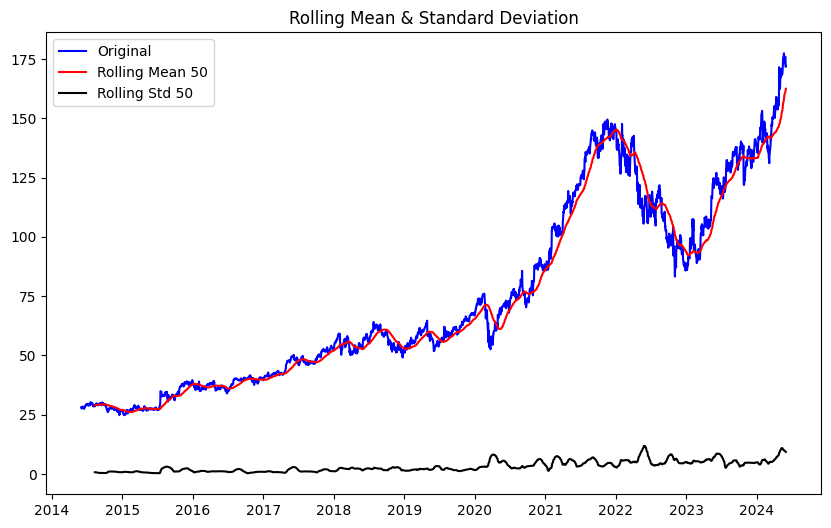

In [4]:
# Í±∞ÎûòÎüâÏù¥ 0Ïù∏ ÏùºÏûê Ï†úÍ±∞ Î∞è ÏàòÏ†ïÏ¢ÖÍ∞Ä Îç∞Ïù¥ÌÑ∞Îßå ÏÇ¨Ïö©
data = data['Adj Close'][data['Volume'] != 0]

# Ïù¥ÎèôÌèâÍ∑† Î∞è Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞® ÏãúÍ∞ÅÌôî Ìï®Ïàò
def plot_rolling(data, interval):
    rolmean = data.rolling(interval).mean()
    rolstd = data.rolling(interval).std()
    plt.figure(figsize=(10, 6))
    plt.plot(data, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean {}'.format(interval))
    plt.plot(rolstd, color='black', label='Rolling Std {}'.format(interval))
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

# 50ÏùºÏπò Ïù¥ÎèôÌèâÍ∑† Î∞è Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞® Í≥ÑÏÇ∞
plot_rolling(data, interval= 50)


## **3. ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Ïùò Ï†ïÏÉÅÏÑ± ÌôïÏù∏ - ADF ÌÖåÏä§Ìä∏**

### **Î™©Ìëú**
ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Ïùò Ï†ïÏÉÅÏÑ± Ïó¨Î∂ÄÎ•º ÌôïÏù∏Ìï©ÎãàÎã§. Ï†ïÏÉÅÏÑ±ÏùÄ ÏòàÏ∏° Î™®Îç∏ÏùÑ Ï†ÅÏö©ÌïòÍ∏∞ ÏúÑÌïú ÌïÑÏàò Ï°∞Í±¥ÏúºÎ°ú, Îç∞Ïù¥ÌÑ∞Î•º Ï†ÅÏ†àÌûà Î≥ÄÌôòÌïòÏó¨ ÏòàÏ∏° Î™®Îç∏Ïù¥ Îçî Ïûò ÏûëÎèôÌï† Ïàò ÏûàÎèÑÎ°ù Ìï©ÎãàÎã§.

### **ÏßÄÏãúÏÇ¨Ìï≠**:

- ADF(Augmented Dickey-Fuller) ÌÖåÏä§Ìä∏Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Ïùò Ï†ïÏÉÅÏÑ± Ïó¨Î∂ÄÎ•º ÌôïÏù∏ÌïòÏÑ∏Ïöî.
- 1Ï∞® Ï∞®Î∂Ñ Îç∞Ïù¥ÌÑ∞Î•º ÏÉùÏÑ±ÌïòÍ≥†, 1Ï∞® Ï∞®Î∂Ñ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ ADF ÌÖåÏä§Ìä∏Î•º ÏàòÌñâÌïòÏó¨ Ï†ïÏÉÅÏÑ± Ïó¨Î∂ÄÎ•º ÌôïÏù∏ÌïòÏÑ∏Ïöî.
- ADF ÌÖåÏä§Ìä∏Ïùò p-value Í≤∞Í≥ºÎ•º Î∞îÌÉïÏúºÎ°ú, ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÏôÄ 1Ï∞® Ï∞®Î∂Ñ Îç∞Ïù¥ÌÑ∞Ïùò Ï†ïÏÉÅÏÑ± Ïó¨Î∂ÄÎ•º ÎÖºÏùòÌïòÏÑ∏Ïöî.


In [5]:
# ADF ÌÖåÏä§Ìä∏ Ìï®Ïàò Ï†ïÏùò
def adf_test(data):
    result = adfuller(data.values)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    return result[1]

# ADF ÌÖåÏä§Ìä∏ ÏàòÌñâ - ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞
print("ADF Test - ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞")
p_value_original = adf_test(data)  # ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî.

# 1Ï∞® Ï∞®Î∂Ñ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± Î∞è ADF ÌÖåÏä§Ìä∏ ÏàòÌñâ
dff1 = data.diff().dropna()
print("\nADF Test - 1Ï∞® Ï∞®Î∂Ñ Îç∞Ïù¥ÌÑ∞")
p_value_diff1 = adf_test(dff1)  # 1Ï∞® Ï∞®Î∂Ñ Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî.


ADF Test - ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞
ADF Statistics: 0.767167
p-value: 0.991087

ADF Test - 1Ï∞® Ï∞®Î∂Ñ Îç∞Ïù¥ÌÑ∞
ADF Statistics: -12.235714
p-value: 0.000000


#### Ìï¥ÏÑù

ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Ïùò Í≤ΩÏö∞ PÍ∞íÏù¥ 0.991087ÏúºÎ°ú Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï† Ïàò ÏóÜÍ∏∞Ïóê Ïú†ÏùòÎØ∏Ìïú ÏàòÏ§ÄÏóêÏÑú ÎπÑÏ†ïÏÉÅÏÑ±ÏùÑ Í∞ÄÏßÑÎã§Í≥† Î≥º Ïàò ÏûàÎã§.

-

1Ï∞® Ï∞®Î∂Ñ Îç∞Ïù¥ÌÑ∞Ïùò Í≤ΩÏö∞ PÍ∞íÏù¥ Îß§Ïö∞ ÎÇÆÏúºÎØÄÎ°ú Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïòÏó¨ Ïú†ÏùòÎØ∏Ìïú ÏàòÏ§ÄÏóêÏÑú Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ïÏÉÅÏÑ±ÏùÑ Í∞ÄÏßÑÎã§Í≥† Î≥º Ïàò ÏûàÎã§.

## **4. ARIMA Î™®Îç∏ Î™®Ïàò(p, d, q) Ï∂îÏ†ï**
### **Î™©Ìëú**
- ACF(Autocorrelation Function)ÏôÄ PACF(Partial Autocorrelation Function) ÌîåÎ°ØÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ARIMA Î™®Îç∏Ïùò Ï†ÅÏ†àÌïú Î™®Ïàò(p, d, q)Î•º Ï∂îÏ†ïÌï©ÎãàÎã§. ÎòêÌïú, Auto-ARIMAÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Î™®ÏàòÎ•º ÏûêÎèôÏúºÎ°ú Ï∂îÏ†ïÌïòÍ≥†, Îëê Í≤∞Í≥ºÎ•º ÎπÑÍµêÌï©ÎãàÎã§.


### **ÏßÄÏãúÏÇ¨Ìï≠**

- ACFÏôÄ PACF ÌîåÎ°ØÏùÑ Í∑∏Î†§ pÏôÄ q Í∞íÏùÑ Ï∂îÏ†ïÌïòÏÑ∏Ïöî.
Auto-ARIMAÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÏµúÏ†ÅÏùò p, d, q Í∞íÏùÑ ÏûêÎèôÏúºÎ°ú Ï∂îÏ†ïÌïòÏÑ∏Ïöî.

- ACFÏôÄ PACF ÌîåÎ°ØÏùÑ ÌÜµÌï¥ pÏôÄ q Í∞íÏùÑ Ï∂îÏ†ïÌïòÎäî Î∞©Î≤ïÍ≥º Auto-ARIMAÏùò Í≤∞Í≥ºÍ∞Ä ÏùºÏπòÌïòÎäîÏßÄ ÎÖºÏùòÌïòÏÑ∏Ïöî.




In [ ]:
!pip install pmdarima

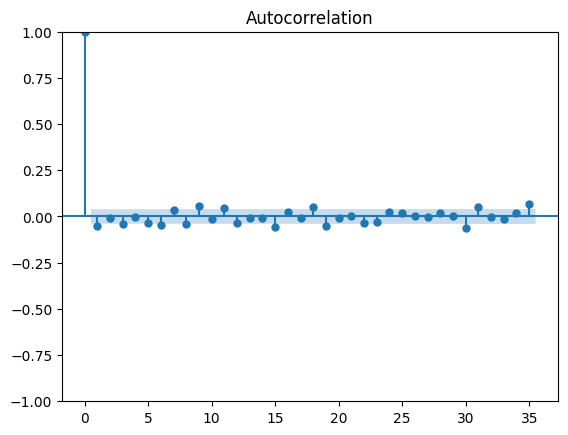

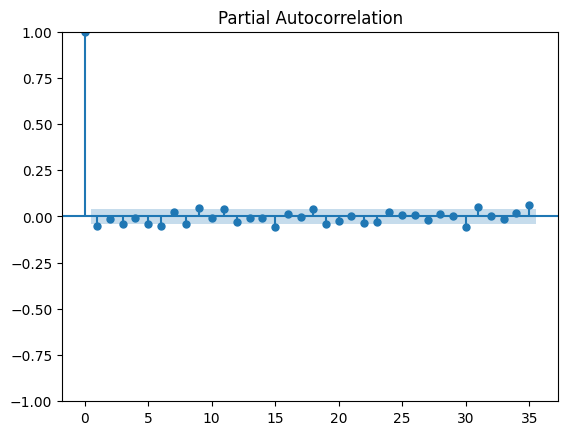

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2517
Model:               SARIMAX(3, 1, 0)   Log Likelihood               -4997.107
Date:                Tue, 10 Sep 2024   AIC                          10002.215
Time:                        08:26:17   BIC                          10025.536
Sample:                             0   HQIC                         10010.679
                               - 2517                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7770      0.011    -69.503      0.000      -0.799      -0.755
ar.L2         -0.5101      0.015    -34.640      0.000      -0.539      -0.481
ar.L3         -0.2710      0.013    -20.851      0.0

In [7]:
# ACFÏôÄ PACF ÌîåÎ°Ø Í∑∏Î¶¨Í∏∞
plot_acf(dff1)  # 1Ï∞® Ï∞®Î∂Ñ Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî.
plot_pacf(dff1)  # 1Ï∞® Ï∞®Î∂Ñ Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî.
plt.show()

# Auto-ARIMAÎ•º ÏÇ¨Ïö©Ìïú Î™®Ïàò Ï∂îÏ†ï
model = pm.auto_arima(dff1, d=1, start_p=0, max_p=3, start_q=0, max_q=3, seasonal=False, stepwise=True)
print(model.summary())

#### Ìï¥ÏÑù

PlotÏùÑ Ìï¥ÏÑùÌïú Í≤∞Í≥º ACFÏôÄ PACFÏóêÏÑú yÍ∞íÏù¥ lagÍ∞Ä 2Ïùº ÎïåÎ∂ÄÌÑ∞ ÏÉÅÍ¥ÄÏÑ± 0Ïùò Ïã†Î¢∞ Íµ¨Í∞Ñ ÏïàÏóê Îì§Ïñ¥Ïò§ÎØÄÎ°ú pÏôÄ q Î™®Îëê 1Î°ú ÏÑ§Ï†ïÌï®Ïù¥ Î∞îÎûåÏßÅÌïòÎã§.


Auto-ARIMAÏùò Í≤ΩÏö∞ p=3, q=0ÏùÑ ÏµúÏ†ÅÍ∞íÏúºÎ°ú ÌåêÎã®ÌïòÏòÄÎã§. Ïù¥ Í≤∞Í≥ºÎ•º Î¥§ÏùÑ Îïå Auto-ARIMAÎäî ACF Í∞íÏùÑ Ï¢Ä Îçî Ïú†Ïó∞ÌïòÍ≤å Ìï¥ÏÑùÌïòÏòÄÍ≥†, Î∞òÎåÄÎ°ú PACFÏùò Í∞íÏùÑ Îçî ÏóÑÍ≤©ÌïòÍ≤å Ìï¥ÏÑùÌñàÏùåÏùÑ Ïïå Ïàò ÏûàÎã§.


### 5. ARIMA Î™®Îç∏ ÌõàÎ†® Î∞è ÏòàÏ∏°
**Î™©Ìëú**
- ARIMA Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞Î•º ÏòàÏ∏°ÌïòÍ≥†, ÌõàÎ†®Îêú Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌï©ÎãàÎã§.

**ÏßÄÏãúÏÇ¨Ìï≠**

- Îç∞Ïù¥ÌÑ∞Î•º 90%Ïùò ÌõàÎ†® ÏÑ∏Ìä∏ÏôÄ 10%Ïùò ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Î°ú Î∂ÑÎ¶¨ÌïòÏÑ∏Ïöî.
- ARIMA Î™®Îç∏ÏùÑ ÌõàÎ†®ÏãúÌÇ§Í≥†, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°ÏùÑ ÏàòÌñâÌïòÏÑ∏Ïöî.
- ÏòàÏ∏° Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÌôîÌïòÏó¨ Ïã§Ï†ú Í∞íÍ≥º ÎπÑÍµêÌïòÏÑ∏Ïöî.

**ÏßàÎ¨∏**

- ÏòàÏ∏° Í≤∞Í≥ºÍ∞Ä Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ÏôÄ ÏñºÎßàÎÇò Ïûò ÏùºÏπòÌïòÎÇòÏöî?
- ÏòàÏ∏°Ïù¥ ÏûòÎ™ªÎêú Î∂ÄÎ∂ÑÏù¥ ÏûàÎã§Î©¥, Í∑∏ Ïù¥Ïú†Îäî Î¨¥ÏóáÏùºÍπåÏöî?



                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2266
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -4005.643
Date:                Tue, 10 Sep 2024   AIC                           8019.285
Time:                        08:42:37   BIC                           8042.187
Sample:                             0   HQIC                          8027.641
                               - 2266                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0106      0.008      1.342      0.180      -0.005       0.026
ar.L1          0.7452      0.083      8.949      0.000       0.582       0.908
ma.L1         -0.7881      0.077    -10.203      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


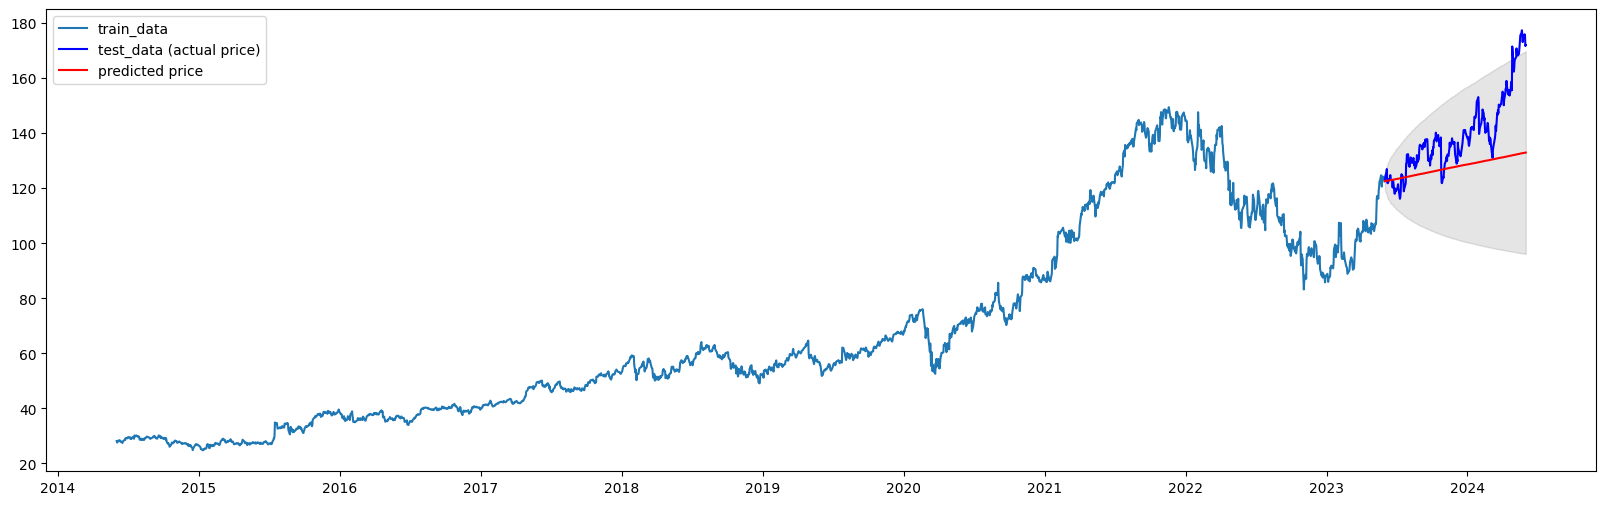

In [8]:
# Train/Test Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
train_data, test_data = data[:int(len(data)*0.9)], data[int(len(data)*0.9):]

# ARIMA Î™®Îç∏ ÌõàÎ†®
model_fit = pm.auto_arima(train_data, d=1, start_p=0, max_p=2, start_q=0, max_q=2, seasonal=False, stepwise=True)
print(model_fit.summary())

def forecast(n_periods, model, test_index, data):
    # Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏòàÏ∏° Î∞è Ïã†Î¢∞ Íµ¨Í∞Ñ Î∞òÌôò
    fc, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)
    upper = conf_int[:, 1]  # ÏÉÅÌïú Ïã†Î¢∞ Íµ¨Í∞Ñ
    lower = conf_int[:, 0]  # ÌïòÌïú Ïã†Î¢∞ Íµ¨Í∞Ñ


    # SeriesÎ°ú Î≥ÄÌôòÌïòÏó¨ Ïù∏Îç±Ïä§ ÏÑ§Ï†ï
    fc_series = pd.Series(fc.values, index=test_index, name='Forecast')
    upper_series = pd.Series(upper, index=test_index, name='Upper_CI')
    lower_series = pd.Series(lower, index=test_index, name='Lower_CI')


    return fc_series, upper_series, lower_series

# ÏòàÏ∏° ÏàòÌñâ Î∞è Í≤∞Í≥º ÏãúÍ∞ÅÌôî
fc, upper, lower = forecast(len(test_data), model_fit, test_data.index, data= test_data)



plt.figure(figsize=(20, 6))
plt.plot(train_data, label='train_data')
plt.plot(test_data, c='b', label='test_data (actual price)')
plt.plot(fc, c='r', label='predicted price')
plt.fill_between(test_data.index, lower, upper, color='k', alpha=.10)
plt.legend(loc='upper left')
plt.show()


Ïã§Ï†úÏôÄ ÏòàÏ∏°Í∞íÏóê ÍΩ§ ÌÅ∞ Ï∞®Ïù¥Í∞Ä ÎÇòÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§. Ïù¥Îäî ÏßÅÏÑ†Ï†ÅÏù∏ Î™®ÏñëÏúºÎ°ú ÏòàÏ∏°Í∞íÏùÑ Î∞òÌôòÌïú Ï†ê, Ï∂îÍ∞ÄÏ†ÅÏù∏ Ïô∏Î∂Ä ÏöîÏù∏(Î¨ºÍ∞Ä, Í∏àÎ¶¨, Ï∂îÍ∞ÄÏ†Å Í≤ΩÏ†ú ÏÉÅÌô© Îì±)ÏùÑ Í≥†Î†§ÌïòÏßÄ ÏïäÏùÄ Ï†ê, ÌõÑÎ∞òÎ∂ÄÏóê Í∏∞Ï°¥Ïùò Ï∂îÏÑ∏ÏôÄ Îã¨Î¶¨ Ï£ºÍ∞ÄÍ∞Ä Í∏âÏ¶ùÌïú Ï†ê Îì±Ïù¥ ÏõêÏù∏Ïù¥ Îêú Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.

## 6. Î™®Îç∏ ÌèâÍ∞Ä Î∞è Ìñ•ÌõÑ 1ÎÖÑ ÏòàÏ∏°
**Î™©Ìëú**
- ARIMA Î™®Îç∏Ïùò ÏòàÏ∏° ÏÑ±Îä•ÏùÑ Îã§ÏñëÌïú ÏßÄÌëúÎ°ú ÌèâÍ∞ÄÌïòÍ≥†, Ìñ•ÌõÑ 1ÎÖÑÍ∞ÑÏùò Ï£ºÍ∞ÄÎ•º ÏòàÏ∏°ÌïòÏó¨ ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Ïùò ÎØ∏Îûò ÎèôÌñ•ÏùÑ Î∂ÑÏÑùÌï©ÎãàÎã§.

**ÏßÄÏãúÏÇ¨Ìï≠**

- MSE, MAE, RMSE, MAPEÎ•º Í≥ÑÏÇ∞ÌïòÏó¨ Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌïòÏÑ∏Ïöî.
- Ìñ•ÌõÑ 1ÎÖÑÍ∞ÑÏùò Ï£ºÍ∞ÄÎ•º ÏòàÏ∏°ÌïòÍ≥†, ÏòàÏ∏° Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÌôîÌïòÏÑ∏Ïöî.


**ÏßàÎ¨∏**

- ÌèâÍ∞Ä ÏßÄÌëú Ï§ë Í∞ÄÏû• Ï§ëÏöîÌïú Í≤ÉÏùÄ Î¨¥ÏóáÏù¥ÎùºÍ≥† ÏÉùÍ∞ÅÌïòÎÇòÏöî? Í∑∏ Ïù¥Ïú†Îäî Î¨¥ÏóáÏù∏Í∞ÄÏöî?
- Ìñ•ÌõÑ 1ÎÖÑÍ∞Ñ ÏòàÏ∏°Ìïú Ï£ºÍ∞ÄÎ•º Í∏∞Î∞òÏúºÎ°ú Ïñ¥Îñ§ Í≤∞Î°†ÏùÑ ÎèÑÏ∂úÌï† Ïàò ÏûàÎÇòÏöî?

In [9]:
# Î™®Îç∏Ïùò Ïò§Ï∞®Ïú® Í≥ÑÏÇ∞
mse = mean_squared_error(test_data, fc)  # Ï≤´ Î≤àÏß∏ Ïù∏ÏàòÎ•º ÎπàÏπ∏ÏúºÎ°ú ÎÇ®Í≤®ÎëêÏÑ∏Ïöî.
mae = mean_absolute_error(test_data, fc)  # Ï≤´ Î≤àÏß∏ Ïù∏ÏàòÎ•º ÎπàÏπ∏ÏúºÎ°ú ÎÇ®Í≤®ÎëêÏÑ∏Ïöî.

rmse = math.sqrt(mse)
mape = np.mean(np.abs(fc - test_data) / np.abs(test_data)) * 100

print(f'MSE: {mse}, MAE: {mae}, RMSE: {rmse}, MAPE: {mape}')

MSE: 266.04286812627174, MAE: 12.17104502948537, RMSE: 16.310820584086862, MAPE: 8.12623343319138


#### Ìï¥ÏÑù

ÌèâÍ∞Ä ÏßÄÌëú Ï§ë Í∞ÄÏû• Ï§ëÏöîÌïú Í≤ÉÏùÄ ÏßÅÍ¥ÄÏ†ÅÏúºÎ°ú Ï£ºÏãù Ïò§Ï∞®Ïùò ÌèâÍ∑†ÏùÑ Ïïå Ïàò ÏûàÎäî MAPEÏùò Í∞íÏù¥ Ï§ëÏöîÌï¥Î≥¥Ïù∏Îã§. Ïã§Ï†úÎ°ú ÎèàÏùÑ Ìà¨ÏûêÌñàÏùÑ Îïå 8% Ï†ïÎèÑÏùò Ïò§Ï∞®Î•º Í∞êÎÇ¥Ìï¥Ïïº Ìï®ÏùÑ ÏùòÎØ∏ÌïòÎØÄÎ°ú Ï£ºÏãù Í∞ÄÍ≤© ÏòàÏ∏°ÏóêÏÑúÎäî Í∞ÄÏû• ÏßÅÍ¥ÄÏ†ÅÏúºÎ°ú Î≥¥Ïù∏Îã§.

-

Ïò§Ï∞®Í∞Ä ÌèâÍ∑†Ï†ÅÏúºÎ°ú 8%ÎùºÎäî Í≤ÉÏùÄ Ïã§Ï†úÎ°ú ÎèàÏùÑ Ìà¨ÏûêÌñàÏùÑ Îïå 8% Ï†ïÎèÑÏùò Ïò§Ï∞®Î•º Í∞êÎÇ¥Ìï¥Ïïº Ìï®ÏùÑ ÏùòÎØ∏ÌïúÎã§. ÌïòÏßÄÎßå Í≤ΩÌóòÏ†ÅÏúºÎ°ú 8%Ïùò Ïò§Ï∞®Îäî Ï£ºÏãù Ìà¨ÏûêÏóêÏÑú ÏâΩÍ≤å Í∞êÎÇ¥ÌïòÍ∏∞ Ïñ¥Î†µÎã§. ÎïåÎ¨∏Ïóê Î™®Îç∏Ïù¥ Ïã§Ïö©Ï†ÅÏù¥ÎùºÍ≥† Î≥¥Í∏∞Îäî Ïñ¥Î†µÎã§Í≥† Ìï† Ïàò ÏûàÎã§.

-

Îã§Îßå Ïã§Ï†úÎ°ú Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïúÎã§Î©¥, ÏïûÏúºÎ°ú Íµ¨Í∏ÄÏùò Ï£ºÍ∞ÄÍ∞Ä Í≥ÑÏÜçÌï¥ÏÑú ÏÉÅÏäπÏÑ∏Î•º ÌÉà ÌôïÎ•†Ïù¥ ÎÜíÎã§Îäî Í≤ÉÏùÑ ÏùòÏÇ¨Í≤∞Ï†ïÏóêÏÑú Í≥†Î†§Ìï† Ïàò ÏûàÏùÑ Í≤ÉÏù¥Îã§.

# **Ï∂îÍ∞Ä ÏÑ†ÌÉù Í≥ºÏ†ú: Prophet Î™®Îç∏ÏùÑ ÌôúÏö©Ìïú ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑù**

ProphetÏùÄ FacebookÏóêÏÑú Í∞úÎ∞úÌïú ÏãúÍ≥ÑÏó¥ ÏòàÏ∏° Î™®Îç∏Î°ú, Í≥ÑÏ†àÏÑ±Í≥º Ìä∏Î†åÎìú Î≥ÄÌôîÎ•º Ìö®Í≥ºÏ†ÅÏúºÎ°ú Ìè¨Ï∞©Ìï† Ïàò ÏûàÎèÑÎ°ù ÏÑ§Í≥ÑÎêòÏñ¥ ÏûàÏäµÎãàÎã§. Prophet Î™®Îç∏ÏùÄ ÏÇ¨Ïö©Ïù¥ ÏâΩÍ≥† ÏßÅÍ¥ÄÏ†ÅÏù∏ ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ïÏùÑ Ï†úÍ≥µÌïòÏó¨ ÎπÑÏ†ÑÎ¨∏Í∞ÄÎèÑ ÏâΩÍ≤å ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎäî Ïû•Ï†êÏù¥ ÏûàÏäµÎãàÎã§. Ïù¥ Í≥ºÏ†úÎäî Prophet Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Google Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÏÑùÌïòÍ≥† ÏòàÏ∏°ÌïòÎäî Í≥ºÏ†úÏûÖÎãàÎã§.

**Í≥ºÏ†ú Î™©Ìëú**: Prophet Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ 2014ÎÖÑ 6Ïõî 1ÏùºÎ∂ÄÌÑ∞ 2024ÎÖÑ 6Ïõî 1ÏùºÍπåÏßÄÏùò Google Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÏÑùÌïòÍ≥†, Ìñ•ÌõÑ 1ÎÖÑÍ∞ÑÏùò Ï£ºÍ∞ÄÎ•º ÏòàÏ∏°Ìï©ÎãàÎã§.

## **Î¨∏Ï†ú 1: Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞ ÏàòÏßë Î∞è Ï†ÑÏ≤òÎ¶¨**

1. Yahoo FinanceÏóêÏÑú GoogleÏùò Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞Î•º ÏàòÏßëÌïòÏÑ∏Ïöî. (Í∏∞Í∞Ñ: 2014ÎÖÑ 6Ïõî 1Ïùº ~ 2024ÎÖÑ 6Ïõî 1Ïùº)
2. 'Adj Close' Ïó¥Îßå ÏÇ¨Ïö©ÌïòÏó¨ Prophet Î™®Îç∏Ïù¥ ÏöîÍµ¨ÌïòÎäî Ìè¨Îß∑(ds, y)ÏúºÎ°ú Îç∞Ïù¥ÌÑ∞Î•º Î≥ÄÌôòÌïòÏÑ∏Ïöî.
3. Î≥ÄÌôòÎêú Îç∞Ïù¥ÌÑ∞Ïùò Ï≤´ 5ÌñâÏùÑ Ï∂úÎ†•ÌïòÏó¨ ÌôïÏù∏ÌïòÏÑ∏Ïöî.

## **Î¨∏Ï†ú 2: Prophet Î™®Îç∏ ÌïôÏäµ**

1. Prophet Î™®Îç∏ÏùÑ Ï¥àÍ∏∞ÌôîÌïòÍ≥† Í≥ÑÏ†àÏÑ±, Ìä∏Î†åÎìú, Ï£ºÍ∏∞ÏÑ±ÏùÑ ÏûêÎèôÏúºÎ°ú Í∞êÏßÄÌï† Ïàò ÏûàÎèÑÎ°ù ÏÑ§Ï†ïÌï©ÎãàÎã§.
2. Î™®Îç∏ÏùÑ Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÌï©(fit)ÏãúÌÇ§ÏÑ∏Ïöî.
3. Î™®Îç∏ ÌïôÏäµÏù¥ ÏôÑÎ£åÎêú ÌõÑ, ÏöîÏïΩ Í≤∞Í≥ºÎ•º Ï∂úÎ†•ÌïòÏó¨ ÌôïÏù∏ÌïòÏÑ∏Ïöî.

## **Î¨∏Ï†ú 3: ÎØ∏Îûò Ï£ºÍ∞Ä ÏòàÏ∏°**

1. Ìñ•ÌõÑ 1ÎÖÑÍ∞ÑÏùò ÎØ∏Îûò Îç∞Ïù¥ÌÑ∞Î•º ÏòàÏ∏°ÌïòÍ∏∞ ÏúÑÌï¥, ÏòàÏ∏°Ìï† ÎÇ†ÏßúÎ•º ÏÉùÏÑ±ÌïòÏÑ∏Ïöî.
2. ÌïôÏäµÎêú Prophet Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÎØ∏Îûò Îç∞Ïù¥ÌÑ∞Î•º ÏòàÏ∏°ÌïòÏÑ∏Ïöî.
3. ÏòàÏ∏° Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÌôîÌïòÍ≥†, Ï∂îÏÑ∏ÏôÄ Î∂àÌôïÏã§ÏÑ± Î≤îÏúÑÎ•º Ìï®Íªò ÌëúÏãúÌïòÏÑ∏Ïöî.

## **Î¨∏Ï†ú 4: Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä**

1. ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞(Ïòà: ÎßàÏßÄÎßâ 10% Îç∞Ïù¥ÌÑ∞)Î•º Ïã§Ï†ú Í∞íÍ≥º ÏòàÏ∏° Í∞íÏúºÎ°ú Î∂ÑÎ¶¨ÌïòÏÑ∏Ïöî.
2. MSE, MAE, RMSE, MAPEÎ•º Í≥ÑÏÇ∞ÌïòÏó¨ Î™®Îç∏Ïùò ÏòàÏ∏° ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌïòÏÑ∏Ïöî.
3. ÏòàÏ∏° ÏÑ±Îä• ÌèâÍ∞Ä Í≤∞Í≥ºÎ•º Ìï¥ÏÑùÌïòÍ≥†, Prophet Î™®Îç∏Ïùò Ïû•Îã®Ï†êÏóê ÎåÄÌï¥ ÎÖºÏùòÌïòÏÑ∏Ïöî.

## **Î¨∏Ï†ú 5: Í≤∞Î°† Î∞è Ï∂îÍ∞Ä Î∂ÑÏÑù**

1. Prophet Î™®Îç∏Ïùò ÏòàÏ∏° Í≤∞Í≥ºÎ•º Î∞îÌÉïÏúºÎ°ú, Ìñ•ÌõÑ 1ÎÖÑÍ∞ÑÏùò Google Ï£ºÍ∞ÄÏóê ÎåÄÌï¥ Í≤∞Î°†ÏùÑ ÎèÑÏ∂úÌïòÏÑ∏Ïöî.
2. Ï∂îÍ∞ÄÏ†ÅÏúºÎ°ú Í≥†Î†§Ìï† ÏöîÏÜå(Ïòà: Ïô∏Î∂Ä Ïù¥Î≤§Ìä∏, Í≤ΩÏ†ú ÏßÄÌëú Îì±)Î•º Ï†úÏãúÌïòÍ≥†, Ïù¥Îü¨Ìïú ÏöîÏÜåÎì§Ïù¥ ÏòàÏ∏° Í≤∞Í≥ºÏóê ÎØ∏Ïπ† Ïàò ÏûàÎäî ÏòÅÌñ•ÏùÑ ÎÖºÏùòÌïòÏÑ∏Ïöî.
3. Prophet Î™®Îç∏Ïùò Ïû•Îã®Ï†êÏùÑ Ï†ïÎ¶¨ÌïòÍ≥†, ARIMA Î™®Îç∏Í≥º ÎπÑÍµêÌïòÏó¨ Ïñ¥Îñ§ ÏÉÅÌô©ÏóêÏÑú Prophet Î™®Îç∏Ïù¥ Îçî Ïú†Î¶¨ÌïúÏßÄ ÏÑ§Î™ÖÌïòÏÑ∏Ïöî.

## **Ï∂îÍ∞Ä ÏßàÎ¨∏**

1. Prophet Î™®Îç∏Ïùò ÏòàÏ∏° Ï†ïÌôïÎèÑÎ•º ÎÜíÏù¥Í∏∞ ÏúÑÌï¥ Ï∂îÍ∞ÄÌï† Ïàò ÏûàÎäî ÏöîÏÜåÎäî Î¨¥ÏóáÏù∏Í∞ÄÏöî?
2. Prophet Î™®Îç∏ÏùÄ ÎπÑÏÑ†ÌòïÏ†ÅÏù∏ Ìå®ÌÑ¥Í≥º Ïô∏Î∂Ä ÏöîÏù∏ÏùÑ Ïûò Î∞òÏòÅÌïòÎäîÍ∞ÄÏöî? Í∑∏ Ïù¥Ïú†Î•º ÏÑ§Î™ÖÌïòÏÑ∏Ïöî.

---

## **Í≥ºÏ†ú Ï†úÏ∂ú Î∞©Î≤ï**
- ÏúÑÏùò Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌïòÍ≥†, ÏΩîÎìúÏôÄ Ìï®Íªò Ìï¥ÏÑù Î∞è Í≤∞Î°†ÏùÑ Ï†úÏ∂úÌïòÏÑ∏Ïöî.
- Ï∂îÍ∞ÄÏ†ÅÏúºÎ°ú Prophet Î™®Îç∏Ïùò Í≤∞Í≥ºÎ•º Îçî Í∞úÏÑ†Ìï† Ïàò ÏûàÎäî Î∞©Î≤ïÏóê ÎåÄÌïú ÏïÑÏù¥ÎîîÏñ¥Î•º Ï†úÏïàÌï¥ Î≥¥ÏÑ∏Ïöî.

Ïù¥ Í≥ºÏ†úÎäî ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑùÏóê ÎåÄÌïú Ïù¥Ìï¥Î•º Ïã¨ÌôîÌïòÍ≥† Prophet Î™®Îç∏ÏùÑ Ïã§Ï†úÎ°ú Ï†ÅÏö©Ìï¥ Î≥¥Í≥† Ïã∂ÏùÄ Î∂ÑÎì§ÏùÑ ÏúÑÌïú ÏÑ†ÌÉù Í≥ºÏ†úÏûÖÎãàÎã§. Í∞ïÏùòÏóêÏÑú Îã§Î£®ÏßÄ ÏïäÏïòÏßÄÎßå, ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏùò Îã§ÏñëÌïú Í∞ÄÎä•ÏÑ±ÏùÑ ÌÉêÍµ¨ÌïòÍ≥† Ïã∂ÏùÄ Î∂ÑÎì§ÏùÄ ÎèÑÏ†ÑÌï¥ Î≥¥ÏÑ∏Ïöî! üòä


### Î¨∏Ï†ú 1

In [ ]:
!pip install prophet

In [3]:
from prophet import Prophet

In [6]:
# ÏãúÏûëÏùº, Ï¢ÖÎ£åÏùº ÏÑ§Ï†ï
start = '2014-06-01'
end = '2024-06-01'

# Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú
data = yf.download('GOOGL' , start=start, end=end)

data = data['Adj Close'][data['Volume'] != 0].reset_index()

data.rename(columns={'Date': 'ds', 'Adj Close': 'y'}, inplace=True)

# Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏: Ï≤´ 5Ìñâ Ï∂úÎ†•
print(data.head())



[*********************100%***********************]  1 of 1 completed

          ds          y
0 2014-06-02  28.147303
1 2014-06-03  27.657017
2 2014-06-04  27.619610
3 2014-06-05  28.176729
4 2014-06-06  28.231594


### Î¨∏Ï†ú 2

DEBUG:cmdstanpy:input tempfile: /tmp/tmpqextvom9/k136swwl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqextvom9/miwortvx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91299', 'data', 'file=/tmp/tmpqextvom9/k136swwl.json', 'init=/tmp/tmpqextvom9/miwortvx.json', 'output', 'file=/tmp/tmpqextvom9/prophet_modell__lt4aj/prophet_model-20240910090359.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:03:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:04:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray.

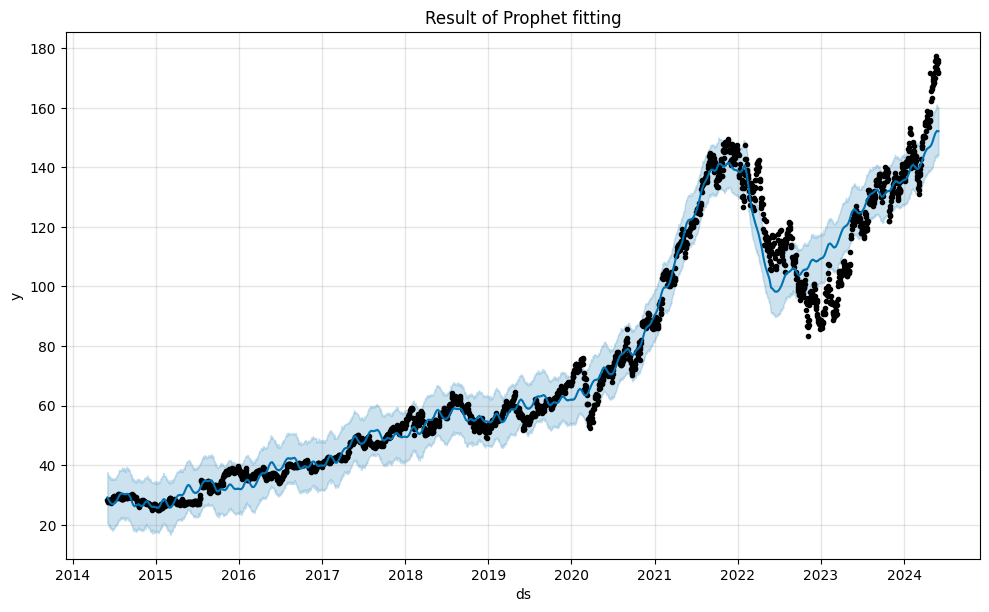

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

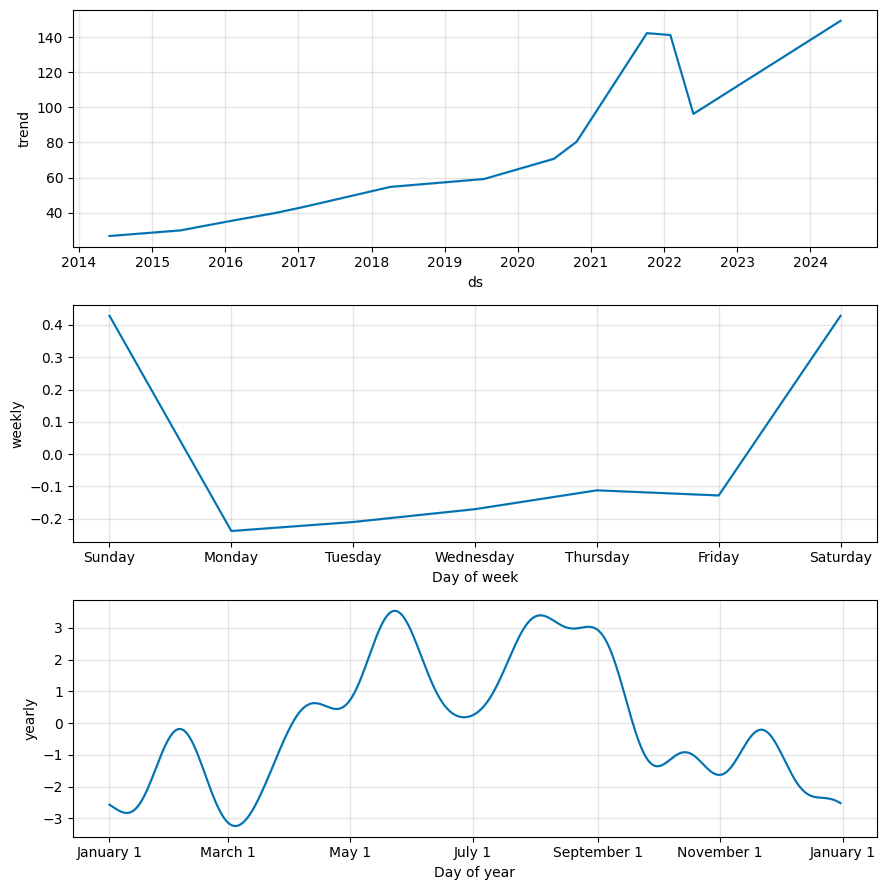

In [15]:
model = Prophet(
    yearly_seasonality=True,  # Ïó∞Í∞Ñ Í≥ÑÏ†àÏÑ± ÏûêÎèô Í∞êÏßÄ
    weekly_seasonality=True,  # Ï£ºÍ∞Ñ Í≥ÑÏ†àÏÑ± ÏûêÎèô Í∞êÏßÄ
    daily_seasonality=False   # ÏùºÎ≥Ñ Í≥ÑÏ†àÏÑ±ÏùÄ ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏùå (Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞Ïóê Î∂àÌïÑÏöî)
)

# Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞Ïóê Prophet Î™®Îç∏ Ï†ÅÌï© (fit)
model.fit(data)

# Î™®Îç∏ ÏöîÏïΩ Í≤∞Í≥º Ï∂úÎ†• (ÏöîÏïΩ Í≤∞Í≥ºÎäî ProphetÏóêÏÑú ÏßÅÏ†ë Ï†úÍ≥µÎêòÏßÄÎäî ÏïäÏúºÎØÄÎ°ú ÎåÄÏã† Ï†ÅÌï© Í≤∞Í≥ºÎ•º Í∑∏ÎûòÌîÑÎ°ú ÌôïÏù∏ Í∞ÄÎä•)

# 3. Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏° ÏàòÌñâ
forecast = model.predict(data)

# 4. Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°Í∞í ÏãúÍ∞ÅÌôî
fig = model.plot(forecast)
plt.title("Result of Prophet fitting")
plt.show()

# 5. ÏöîÏïΩ Í≤∞Í≥º ÏãúÍ∞ÅÌôî
fig2 = model.plot_components(forecast)
plt.show()

### Î¨∏Ï†ú 3

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


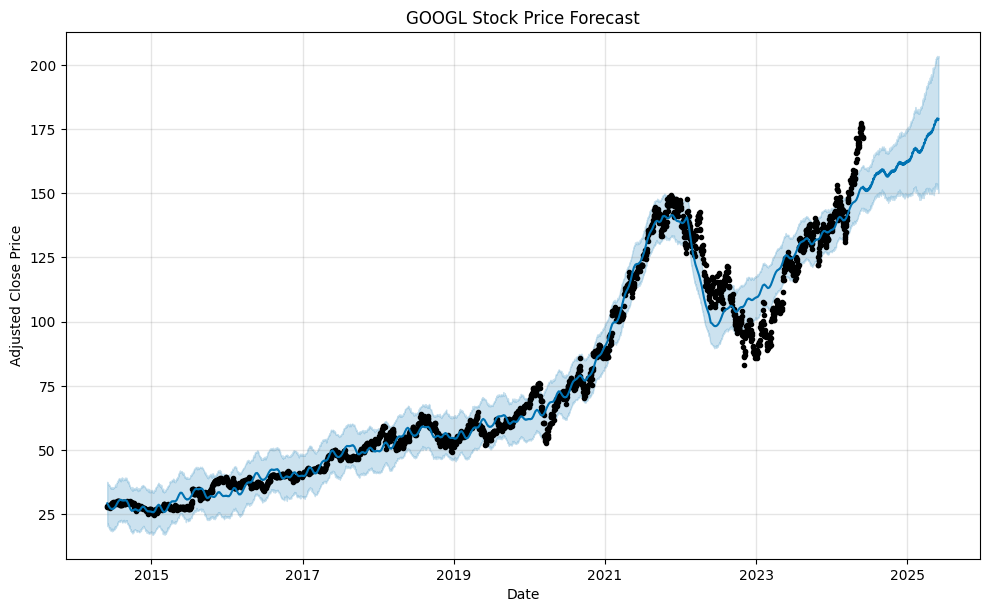

In [16]:
future = model.make_future_dataframe(periods=365)

# ÎØ∏Îûò Îç∞Ïù¥ÌÑ∞Î•º ÏòàÏ∏°
forecast = model.predict(future)

# ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî
fig = model.plot(forecast)
plt.title('GOOGL Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()

### Î¨∏Ï†ú 4

In [48]:
train_data, test_data = data[:int(len(data)*0.9)], data[int(len(data)*0.9):]

model = Prophet(
    yearly_seasonality=True,  # Ïó∞Í∞Ñ Í≥ÑÏ†àÏÑ± ÏûêÎèô Í∞êÏßÄ
    weekly_seasonality=True,  # Ï£ºÍ∞Ñ Í≥ÑÏ†àÏÑ± ÏûêÎèô Í∞êÏßÄ
    daily_seasonality=False   # ÏùºÎ≥Ñ Í≥ÑÏ†àÏÑ±ÏùÄ ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏùå (Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞Ïóê Î∂àÌïÑÏöî)
)

model.fit(train_data)

future = model.make_future_dataframe(periods=366)
forecast = model.predict(future)

# 4. Ïã§Ï†ú Í∞íÍ≥º ÏòàÏ∏° Í∞í Î∂ÑÎ¶¨ (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î≤îÏúÑ)

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò ds Í∞íÏóê Ìï¥ÎãπÌïòÎäî ÏòàÏ∏° Í∞íÎßå ÏÑ†ÌÉù
forecast_test = forecast[forecast['ds'].isin(test_data['ds'])][['ds', 'yhat']].reset_index().drop(columns=['index'])

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏôÄ Ïã§Ï†ú Í∞í Îß§Ïπ≠
actual_test = test_data[['ds', 'y']].reset_index().drop(columns=['index'])

# 5. MSE, MAE, RMSE, MAPE Í≥ÑÏÇ∞
mse = mean_squared_error(actual_test['y'], forecast_test['yhat'])
mae = mean_absolute_error(actual_test['y'], forecast_test['yhat'])
rmse = math.sqrt(mse)
mape = np.mean(np.abs((actual_test['y'] - forecast_test['yhat']) / actual_test['y'])) * 100

print()
print()

# 6. Í≤∞Í≥º Ï∂úÎ†•
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape:.2f}%")

DEBUG:cmdstanpy:input tempfile: /tmp/tmpqextvom9/7co5hz9a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqextvom9/_9527o83.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97151', 'data', 'file=/tmp/tmpqextvom9/7co5hz9a.json', 'init=/tmp/tmpqextvom9/_9527o83.json', 'output', 'file=/tmp/tmpqextvom9/prophet_model8h25xn1q/prophet_model-20240910091658.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:16:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:16:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing




MSE: 4140.99857646836
MAE: 60.844792505852375
RMSE: 64.35059111203532
MAPE: 42.72%


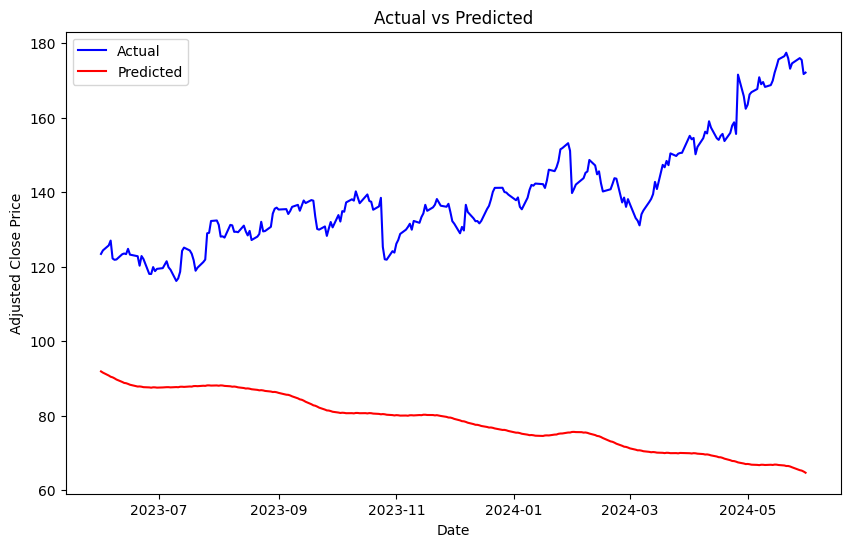

In [49]:
import matplotlib.pyplot as plt

# Ïã§Ï†ú Í∞íÍ≥º ÏòàÏ∏° Í∞í ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Ïã§Ï†ú Í∞í
plt.plot(actual_test['ds'], actual_test['y'], label='Actual', color='blue')

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò ÏòàÏ∏° Í∞í
plt.plot(forecast_test['ds'], forecast_test['yhat'], label='Predicted', color='red')

# Í∑∏ÎûòÌîÑ ÌÉÄÏù¥ÌãÄ Î∞è Î†àÏù¥Î∏î ÏÑ§Ï†ï
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.show()

ÏòàÏ∏° Í≤∞Í≥º ARIMAÏóê ÎπÑÌï¥ ÌÅ∞ Ïò§Ï∞®Î•º Î≥¥ÏòÄÎã§. ÎπÑÎ°ù Ï†ïÌôïÎèÑÎäî Îñ®Ïñ¥ÏßÄÏßÄÎßå Ï∞®Î∂Ñ Îì± Îç∞Ïù¥ÌÑ∞Ïùò Ï†ÑÏ≤òÎ¶¨Í∞Ä ÌïÑÏöîÏóÜÎã§Îäî Ï†êÍ≥º Í≥ÑÏ†àÏÑ±ÏùÑ Î∞òÏòÅÌï† Ïàò ÏûàÎã§Îäî Ï†êÏù¥ ProPhetÏùò Ïû•Ï†êÏúºÎ°ú Î≥¥Ïù∏Îã§. ÎòêÌïú ARIMAÍ∞Ä ÏÑ†ÌòïÏ†ÅÏù∏ Í¥ÄÍ≥ÑÎßåÏùÑ ÏòàÏ∏°Ìïú Í≤ÉÍ≥º Îã¨Î¶¨ ProphetÏùò Í≤ΩÏö∞ ÎπÑÏÑ†ÌòïÏ†ÅÏù∏ Í¥ÄÍ≥Ñ Ïó≠Ïãú ÏòàÏ∏°Ìïú Ï†êÏù¥ Îòê ÌïòÎÇòÏùò Ïû•Ï†êÏù¥Îã§. ÌïòÏßÄÎßå Ï†ïÌôïÎèÑÍ∞Ä ÌòÑÏ†ÄÌûà Îñ®Ïñ¥ÏßÑÎã§Îäî Ï†êÏùÑ Î¥§ÏùÑ Îïå Ïã§Ïö©Ï†ÅÏúºÎ°ú ÏÇ¨Ïö©ÌïòÍ∏∞Îäî Ïñ¥Î†§ÏõåÎ≥¥Ïù∏Îã§.

### Î¨∏Ï†ú 5

#### Ìï¥ÏÑù

 Prophet Î™®Îç∏Ïùò Í≤ΩÏö∞ ÏΩîÎî©Ïùò Î¨∏Ï†úÏù∏ÏßÄÎäî Î™®Î•¥Í≤†ÏßÄÎßå Íµ¨Í∏ÄÏùò Ï£ºÍ∞ÄÎ•º ÌïòÎùΩÏÑ∏Î°ú ÌèâÍ∞ÄÌïòÏòÄÎã§. Îî∞ÎùºÏÑú Ìï¥Îãπ Í≤∞Í≥ºÎ•º Îî∞Î•∏Îã§Î©¥ Íµ¨Í∏ÄÏóê Ìà¨ÏûêÌïòÏßÄ ÏïäÎäî Í≤ÉÏù¥ ÎßûÎäî ÌåêÎã®ÏúºÎ°ú Î≥¥Ïù∏Îã§.

 -

 Ï∂îÍ∞ÄÏ†ÅÏù∏ ÏßÄÌëúÎ°ú Í∏àÎ¶¨, Î¨ºÍ∞Ä, Ìï¥Îãπ Ï¢ÖÎ™©Ïùò ÏÑ±Ïû•ÏÑ±Í≥º ÏïàÏ†ïÏÑ±, ÌôòÏú®, Ïã§ÏóÖÎ•† Îì±ÏùÑ Í≥†Î†§ÌïòÏó¨ Ï£ºÍ∞Ä ÏòàÏ∏°Ïóê ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏùÑ Í≤ÉÏù¥Îã§.

 -

 ÎßàÏßÄÎßâÏúºÎ°ú ARIMAÏôÄ PropherÏùÑ ÎπÑÍµêÌñàÏùÑ Îïå Ï†ïÌôïÏÑ±Ïù¥ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎçîÏö± ÎÜíÎã§Îäî Ï†êÏóêÏÑú ARIMA Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ Ïú†Î¶¨ÌïòÎã§Í≥† ÏÉùÍ∞ÅÎêúÎã§.

### Ï∂îÍ∞Ä Î¨∏Ï†ú

####

1. ÏúÑÏóêÏÑú Ïñ∏Í∏âÌïú Î∞îÏôÄ Í∞ôÏù¥ Í∏àÎ¶¨, Î¨ºÍ∞Ä, Ìï¥Îãπ Ï¢ÖÎ™©Ïùò ÏÑ±Ïû•ÏÑ±Í≥º ÏïàÏ†ïÏÑ±, ÌôòÏú®, Ïã§ÏóÖÎ•† Îì±Ïùò Í≤ΩÏ†ú ÏßÄÌëúÎ•º Ï∂îÍ∞ÄÏ†ÅÏúºÎ°ú ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏùÑ Í≤ÉÏù¥Îã§.

2. Î∂ÑÏÑù Í≤∞Í≥ºÎ•º Î¥§ÏùÑ Îïå ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞Î°úÏÑú Ïó¥Îßå Ï∂îÍ∞ÄÌïòÎ©¥ ÎêòÍ∏∞Ïóê Ï∂îÍ∞Ä ÏöîÏù∏ÏùÑ Ïûò Î∞òÏòÅÌï† Ïàò ÏûàÏñ¥Î≥¥Ïù¥Í≥†, ÎπÑÏÑ†ÌòïÏ†ÅÏù∏ Î™®Ïäµ Ïó≠Ïãú Ïûò ÏòàÏ∏°Ìï† Ïàò ÏûàÎäî Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.